# Image mask and image manipulation

Image masks have the same size of the CT images, in fact they should have the same header as its orginal CT image.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

Now, instead of opening the CT image we'll load an image mask.

In [2]:
mask = nib.load("../DATA/LUNG-001/GTV-1.nii.gz")
mask

In [3]:
mask.shape

(512, 512, 134)

In [4]:
print(mask.header.get_zooms())

(0.9765625, 0.9765625, 3.0)


In [5]:
print(mask.header.get_xyzt_units())

('mm', 'unknown')


In [6]:
print(nib.orientations.aff2axcodes(mask.affine))

('L', 'P', 'S')


In [7]:
print(mask.get_fdata().ndim)

3


## plot mask

with respect to the CT image, the mask doesn't have any HU information. It is 1 where there is the region of interest and 0 where it's not.

(512, 512, 134)


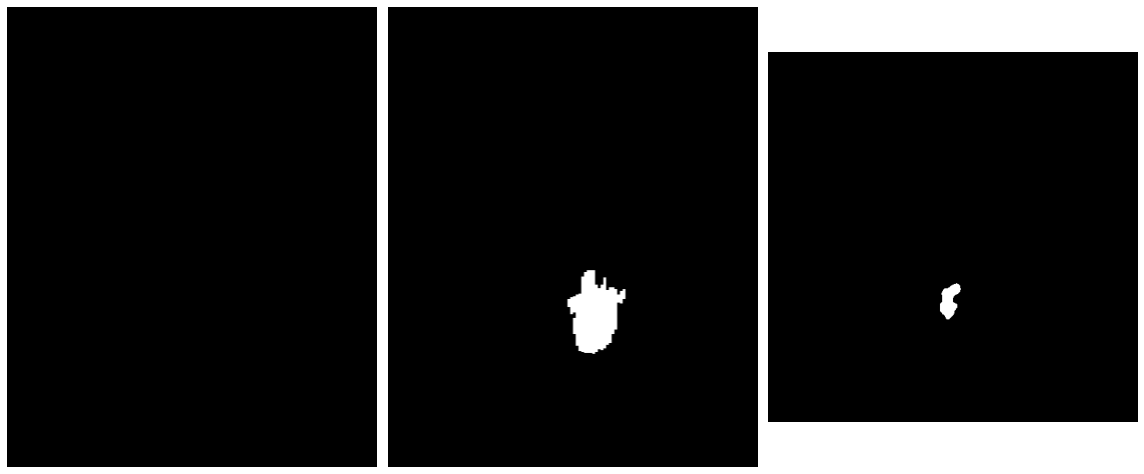

In [8]:
mask_data = mask.get_fdata()
print(mask_data.shape)

xm = mask_data.shape[0]//2
ym = mask_data.shape[1]//2
zm = mask_data.shape[2]//2

x_dim, y_dim, z_dim = mask.header.get_zooms()
yz_corr = y_dim / z_dim
xz_corr = x_dim / z_dim
xy_corr = x_dim / y_dim

fig, ax = plt.subplots(1,3,figsize=(16,9),tight_layout=True,sharey="row")
ax[0].imshow(mask_data[xm,...],aspect=yz_corr,cmap="gray")
ax[1].imshow(mask_data[:,ym,:],aspect=xz_corr,cmap="gray")
ax[2].imshow(mask_data[...,zm],aspect=xy_corr,cmap="gray")
for i in range(3):
    ax[i].axis("off")
plt.show()
plt.close()

## Load and plot multiple masks

Now that we know how to load 1 mask we are able to load and plot all masks one on top of the other. For simplicity we'll use a python list.

In [9]:
mask_extension = ".nii.gz"
mask_name = ["GTV-1",
             "Lung-Left",
             "Lung-Right",
             "Spinal-Cord"]
nib_masks = [nib.load(os.path.join("../DATA/LUNG-001/",
                                   "{}{}".format(i,mask_extension))) 
             for i in mask_name]
nib_masks

Now that we have the data set in lists we can loop through and plot them

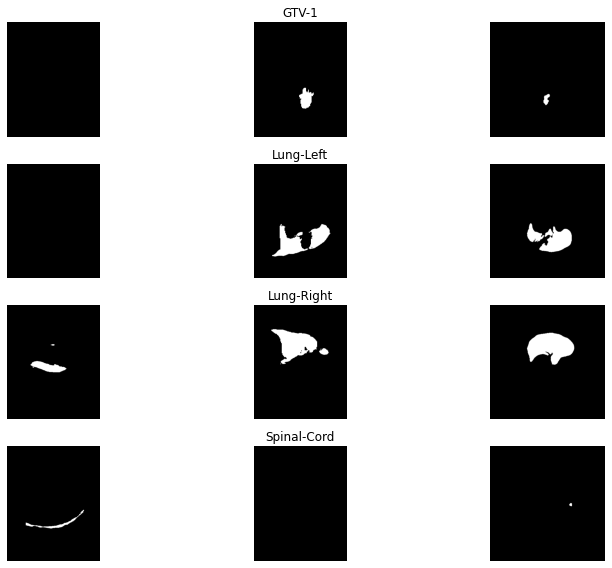

In [10]:
fig, ax = plt.subplots(len(mask_name), 3, figsize=(12,8), tight_layout=True, sharey="row")
for i in range(len(mask_name)):
    mask_data = nib_masks[i].get_fdata()
    ax[i,1].set_title(mask_name[i])
    ax[i,0].imshow(mask_data[xm,...],aspect=yz_corr,cmap="gray")
    ax[i,1].imshow(mask_data[:,ym,:],aspect=xz_corr,cmap="gray")
    ax[i,2].imshow(mask_data[...,zm],aspect=xy_corr,cmap="gray")
    for j in range(3):
        ax[i,j].axis("off")
plt.show()
plt.close()

## Plot masks in one image

We have seen that plotting masks on separate subplots doesn't help the readability of the volume information of the mask. Instead we'll creat 1 mask with different values for each one of the regions.

In [11]:
masks_data = [i.get_fdata() for i in nib_masks]
mask = np.zeros(masks_data[0].shape)

for i in range(len(masks_data)):
    mask[masks_data[i]==1] = i+1
print(mask.min())
print(mask.max())
print(mask.shape)

0.0
4.0
(512, 512, 134)


Now we have one 3D image containing all the mask with a different value.

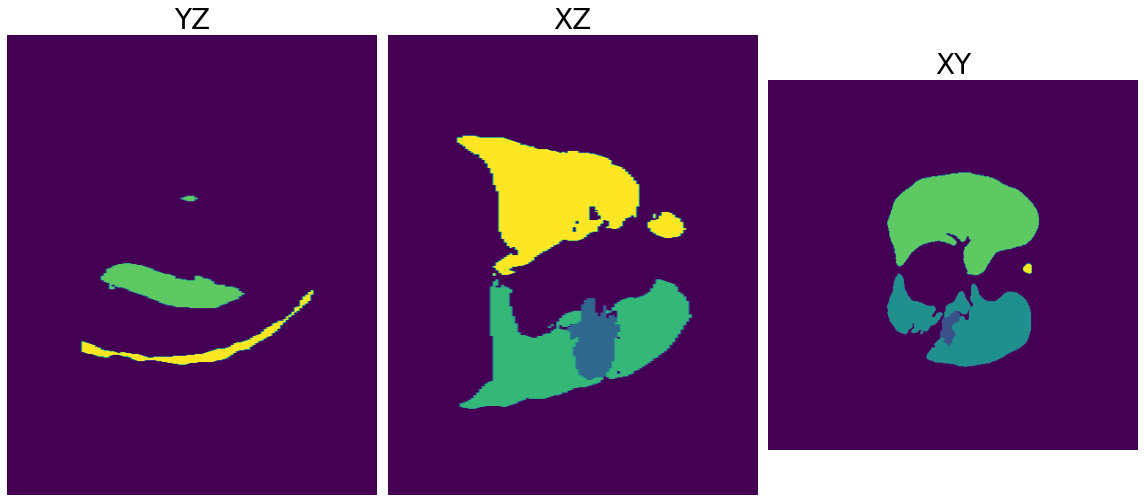

In [12]:
fig, ax = plt.subplots(1,3,figsize=(16,9),tight_layout=True)
ax[0].imshow(mask[xm,...],aspect=yz_corr)
ax[0].set_title("YZ",size=28)
ax[1].imshow(mask[:,ym,:],aspect=xz_corr)
ax[1].set_title("XZ",size=28)
ax[2].imshow(mask[...,zm],aspect=xy_corr)
ax[2].set_title("XY",size=28)
for i in range(3):
    ax[i].axis("off")
plt.show()
plt.close()

# overlay masks over the original image

with matplotlib we can use the masks as an overlay to the original CT image. The NumPy ```.ma.masked_where()``` function defines a mask only where values are greater than 0.

In [13]:
ct_img = nib.load("../DATA/LUNG-001/ct.nii.gz")
ct_img_data = ct_img.get_fdata()
masked_data = np.ma.masked_where(mask <= 0, mask)

Now we have all the necessary data for plotting, we'll set transparency with the alpha parameter of the ```imshow()``` function.

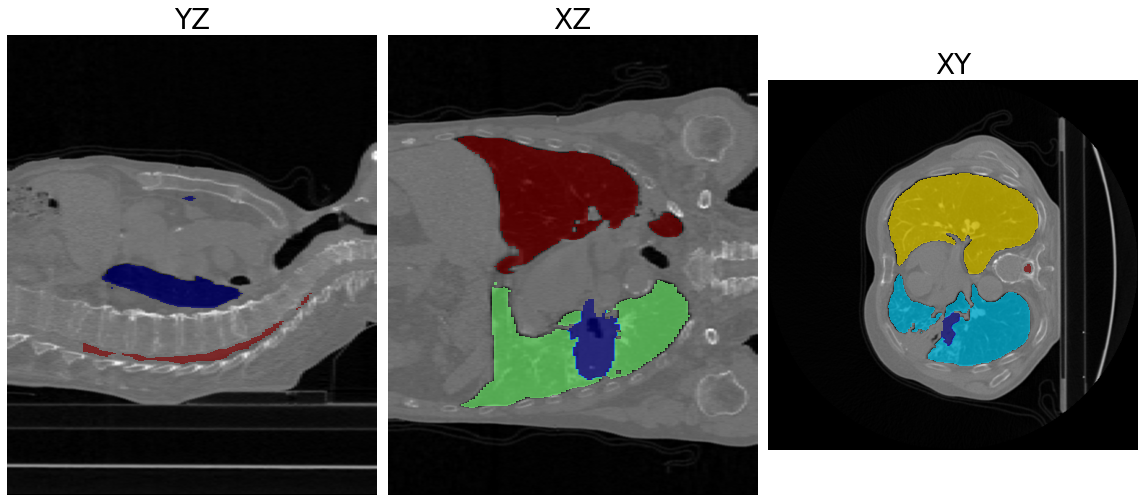

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16,9), tight_layout=True)
ax[0].imshow(ct_img_data[xm,...], aspect=yz_corr,cmap="gray")
ax[0].imshow(masked_data[xm,...], aspect=yz_corr,cmap="jet",alpha=0.65)
ax[0].set_title("YZ",size=28)
ax[1].imshow(ct_img_data[:,ym,:], aspect=xz_corr,cmap="gray")
ax[1].imshow(masked_data[:,ym,:], aspect=xz_corr,cmap="jet",alpha=0.65)
ax[1].set_title("XZ",size=28)
ax[2].imshow(ct_img_data[...,zm], aspect=xy_corr,cmap="gray")
ax[2].imshow(masked_data[...,zm], aspect=xy_corr,cmap="jet",alpha=0.65)
ax[2].set_title("XY",size=28)
for i in range(3):
    ax[i].axis("off")
plt.show()
plt.close()

# use mask to extract HU histogram

We can now extract HU unit values of the different masks and plot them under the 2D visualisations.

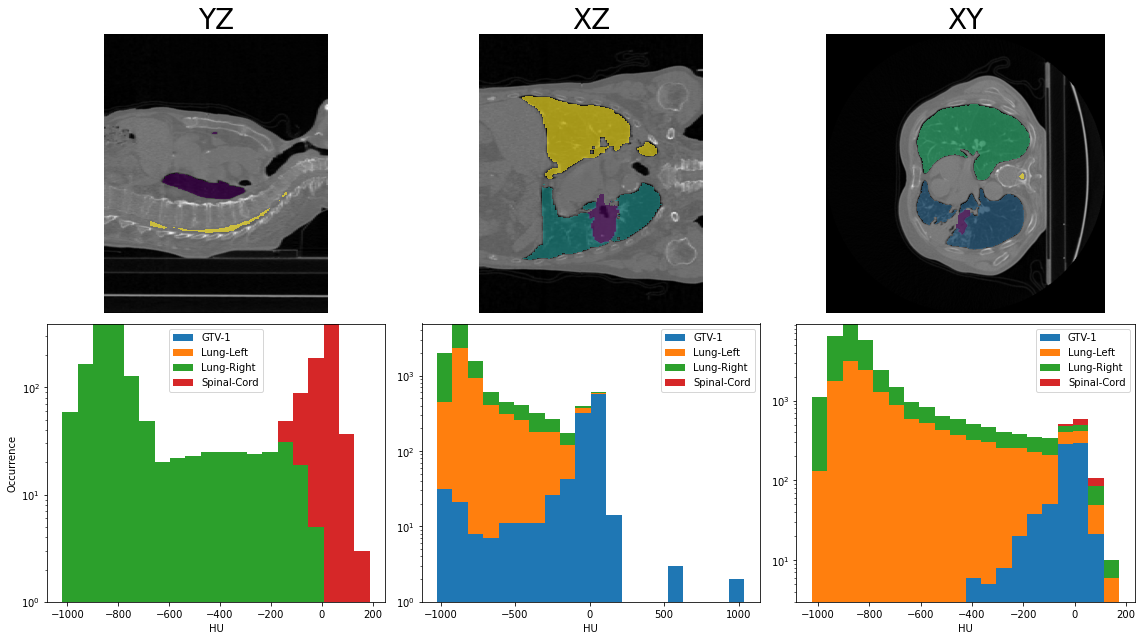

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(16,9), tight_layout=True)
ax[0,0].imshow(ct_img_data[xm,...], aspect=yz_corr,cmap="gray")
ax[0,0].imshow(masked_data[xm,...], aspect=yz_corr,alpha=0.65)
ax[0,0].set_title("YZ",size=28)
ax[0,1].imshow(ct_img_data[:,ym,:], aspect=xz_corr,cmap="gray")
ax[0,1].imshow(masked_data[:,ym,:], aspect=xz_corr,alpha=0.65)
ax[0,1].set_title("XZ",size=28)
ax[0,2].imshow(ct_img_data[...,zm], aspect=xy_corr,cmap="gray")
ax[0,2].imshow(masked_data[...,zm], aspect=xy_corr,alpha=0.65)
ax[0,2].set_title("XY",size=28)
for i in range(3):
    ax[0,i].axis("off")
ax[1,0].hist([ct_img_data[xm,...][mask[xm,...]==i] for i in range(1,5)],
             20,label=mask_name, stacked=True)
ax[1,1].hist([ct_img_data[:,ym,:][mask[:,ym,:]==i] for i in range(1,5)],
             20,label=mask_name, stacked=True)
ax[1,2].hist([ct_img_data[...,zm][mask[...,zm]==i] for i in range(1,5)],
             20,label=mask_name, stacked=True)
for i in range(3):
    ax[1,i].set_yscale("log")
    ax[1,i].set_xlabel("HU")
    ax[1,i].legend()
ax[1,0].set_ylabel("Occurrence")
plt.show()
plt.close()

In [20]:
print([ct_img_data[xm,...][mask[xm,...]==i] for i in range(1,5)])

[array([], dtype=float64), array([], dtype=float64), array([-224., -284., -227., ..., -124.,  -83., -154.]), array([  40.,   91.,   16.,  -15.,  -35.,   -9.,   18.,   15.,   23.,
         69.,   37.,   16.,   11.,   10.,  -12.,   64.,   10.,    8.,
         78.,   87.,   42.,    6.,    3.,   18.,   55.,   32.,  -39.,
          9.,   62.,   39.,  -30.,   98.,   28.,   17.,   68.,   -9.,
         42.,  -21.,  -80.,   -2.,  -26.,    7.,   36.,   42.,  189.,
         17.,   52.,   85.,   81.,   24.,   51.,   44.,   49.,   46.,
          9.,  -13.,  -27.,  -11.,   42.,  -33.,   15.,   24.,   -2.,
          8.,  -26.,  -21.,  -96.,  -28.,  165.,   54.,  -19.,  135.,
         42.,   39.,   43.,   94.,   41.,    6.,   30.,   17.,   17.,
          0.,   37.,  -23.,  -23.,   -3.,   23.,  -37.,   32.,   23.,
         12., -102.,   61.,   42.,   78.,   -8., -141.,   67.,   52.,
         51.,  -17.,  -86.,   23.,   54.,   68.,   15.,  -46.,   32.,
         69.,   46.,  -43.,  -59.,   26.,  113.,   

## Select the volume to Simulate

Simulations are usually slow and need a lot of computation power, especially true for highly detailed geometries. We will now focus our attention to a region around the tumor (the volume of the lungs + 2.5 cm padding).

First of all we have to define the bounding box of the lung and pixel/cm value.

In [21]:
px_cm = 10/np.array(ct_img.header.get_zooms())
print(px_cm)

[10.24      10.24       3.3333333]


Now we get the indexes which define the bounding box around the Lung.

In [22]:
def check(val,v_min,v_max):
    if val < v_min:
        val = v_min
    elif val > v_max:
        val = v_max
    return int(val)

v = ct_img.shape

xmin = check(np.where((mask==2) + (mask==3))[0].min() - 2.5 * px_cm[0],0,v[0])
xmax = check(np.where((mask==2) + (mask==3))[0].max() + 2.5 * px_cm[0],0,v[0])
ymin = check(np.where((mask==2) + (mask==3))[1].min() - 2.5 * px_cm[1],0,v[1])
ymax = check(np.where((mask==2) + (mask==3))[1].max() + 2.5 * px_cm[1],0,v[1])
zmin = check(np.where((mask==2) + (mask==3))[2].min() - 2.5 * px_cm[2],0,v[2])
zmax = check(np.where((mask==2) + (mask==3))[2].max() + 2.5 * px_cm[2],0,v[2])

print(xmin)
print(xmax)
print(ymin)
print(ymax)
print(zmin)
print(zmax)

84
441
134
404
14
119


Now that we have the Bounding Box indexes we are able to select the "window" for our simulation. First of all we grafically check if what we have done is correct.

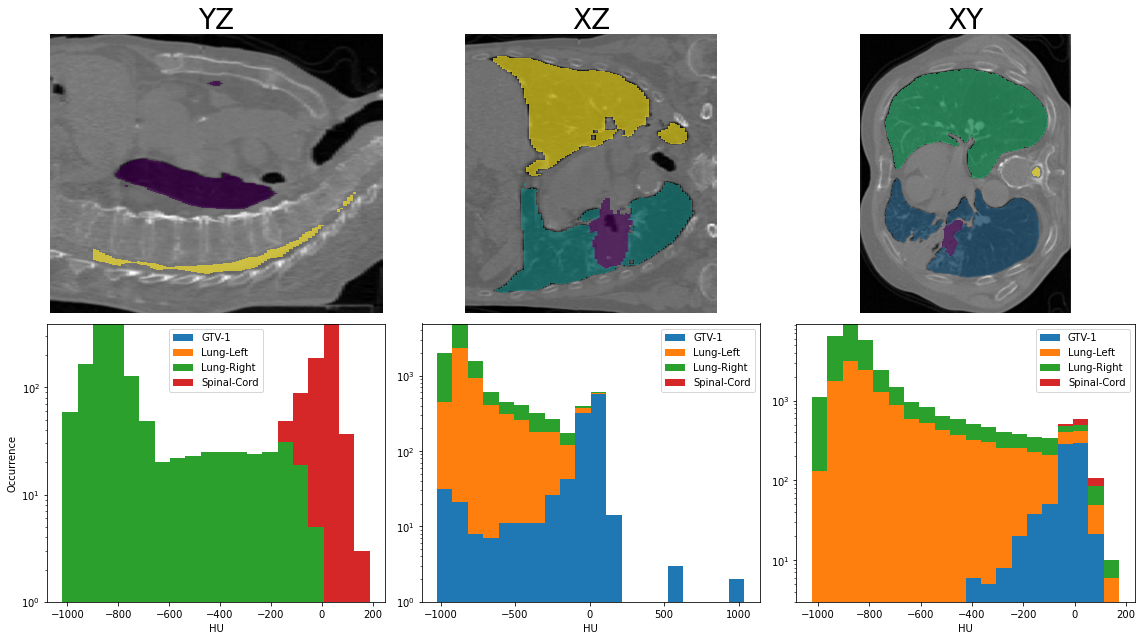

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(16,9), tight_layout=True)
ax[0,0].imshow(ct_img_data[xm,ymin:ymax,zmin:zmax], aspect=yz_corr,cmap="gray")
ax[0,0].imshow(masked_data[xm,ymin:ymax,zmin:zmax], aspect=yz_corr,alpha=0.65)
ax[0,0].set_title("YZ",size=28)
ax[0,1].imshow(ct_img_data[xmin:xmax,ym,zmin:zmax], aspect=xz_corr,cmap="gray")
ax[0,1].imshow(masked_data[xmin:xmax,ym,zmin:zmax], aspect=xz_corr,alpha=0.65)
ax[0,1].set_title("XZ",size=28)
ax[0,2].imshow(ct_img_data[xmin:xmax,ymin:ymax,zm], aspect=xy_corr,cmap="gray")
ax[0,2].imshow(masked_data[xmin:xmax,ymin:ymax,zm], aspect=xy_corr,alpha=0.65)
ax[0,2].set_title("XY",size=28)
for i in range(3):
    ax[0,i].axis("off")
ax[1,0].hist([ct_img_data[xm,ymin:ymax,zmin:zmax][mask[xm,ymin:ymax,zmin:zmax]==i] for i in range(1,5)],20,label=mask_name, stacked=True)
ax[1,1].hist([ct_img_data[xmin:xmax,ym,zmin:zmax][mask[xmin:xmax,ym,zmin:zmax]==i] for i in range(1,5)],20,label=mask_name, stacked=True)
ax[1,2].hist([ct_img_data[xmin:xmax,ymin:ymax,zm][mask[xmin:xmax,ymin:ymax,zm]==i] for i in range(1,5)],20,label=mask_name, stacked=True)
for i in range(3):
    ax[1,i].set_yscale("log")
    ax[1,i].set_xlabel("HU")
    ax[1,i].legend()
ax[1,0].set_ylabel("Occurrence")
plt.show()
plt.close()

We can see that we have the correct window for the simulation, i.e. the lungs are well defined inside the Box. What we are missing is defining all the regions which are not defined by the masks. We can define from the HU scale 3 more materials:

* soft tissue set to 5, i.e. (-450 >= HU < 150) and not other masks
* bone set to 6, i.e. (HU >= 150) and not other masks
* air set to 7, i.e. where the mask is 0

let's do that:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


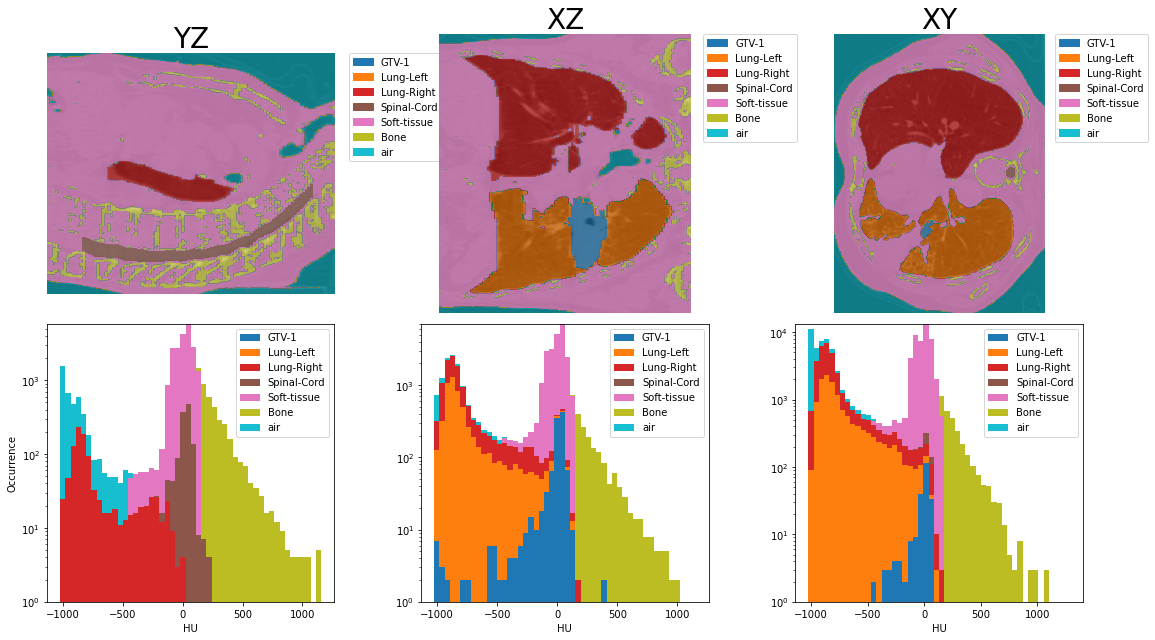

In [24]:
# we now crop the initial image and mask in our Bounding Box
# we will use a deep copy

img_BB  = ct_img_data[xmin:xmax,ymin:ymax,zmin:zmax].copy()
mask_BB = mask[xmin:xmax,ymin:ymax,zmin:zmax].copy()

xm_BB = mask_BB.shape[0]//2
ym_BB = mask_BB.shape[1]//2
zm_BB = mask_BB.shape[2]//2

# soft tissue defined as 5
mask_BB[(img_BB>=-450)&(img_BB<150)&(mask_BB==0)] = 5

# bone tissue defined as 6
mask_BB[(img_BB>=150)&(mask_BB==0)] = 6

# air is defined as 7
# so lets see the plot output of this new mask
mask_BB[(mask_BB==0)] = 7

# redefine mask names
mask_name = ["GTV-1",
             "Lung-Left",
             "Lung-Right",
             "Spinal-Cord",
             "Soft-tissue",
             "Bone",
             "air"]
values = range(1,len(mask_name)+1)

# function that helps in plotting
import matplotlib.patches as mpatches
def ColorLegend(im,values,ax,mask_name=mask_name):
    colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=mask_name[values[i]-1]) ) for i in range(len(values)) ]
    # put those patched as legend-handles into the legend
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    
fig, ax = plt.subplots(2, 3, figsize=(16,9), tight_layout=True)
ax[0,0].imshow(img_BB[xm_BB,...], aspect=yz_corr,cmap="gray")
im1 = ax[0,0].imshow(mask_BB[xm_BB,...], aspect=yz_corr,alpha=0.65,cmap="tab10",vmin=1,vmax=7)
ColorLegend(im1,values,ax[0,0])
ax[0,0].set_title("YZ",size=28)

ax[0,1].imshow(img_BB[:,ym_BB,:], aspect=xz_corr,cmap="gray")
im2 = ax[0,1].imshow(mask_BB[:,ym_BB,:], aspect=xz_corr,alpha=0.65,cmap="tab10",vmin=1,vmax=7)
ColorLegend(im2,values,ax[0,1])
ax[0,1].set_title("XZ",size=28)

ax[0,2].imshow(img_BB[...,zm_BB], aspect=xy_corr,cmap="gray")
im3 = ax[0,2].imshow(mask_BB[...,zm_BB], aspect=xy_corr,alpha=0.65,cmap="tab10",vmin=1,vmax=7)
ColorLegend(im3,values,ax[0,2])
ax[0,2].set_title("XY",size=28)

for i in range(3):
    ax[0,i].axis("off")
    ax[1,i].legend()
    
cmap = plt.get_cmap('tab10')
colors = [cmap(im1.norm(i)) for i in values]

ax[1,0].hist([img_BB[xm_BB,...][mask_BB[xm_BB,...]==i] for i in values],50,label=mask_name, stacked=True,color=colors)
ax[1,1].hist([img_BB[:,ym_BB,:][mask_BB[:,ym_BB,:]==i] for i in values],50,label=mask_name, stacked=True,color=colors)
ax[1,2].hist([img_BB[...,zm_BB][mask_BB[...,zm_BB]==i] for i in values],50,label=mask_name, stacked=True,color=colors)
for i in range(3):
    ax[1,i].set_yscale("log")
    ax[1,i].set_xlabel("HU")
    ax[1,i].legend()
ax[1,0].set_ylabel("Occurrence")
plt.show()
plt.close()

Now we have a 3D space filled with rejons containing different tissue. Let's see how many voxels are present in this volume, so we can start thinking on how to prepare the geometry for the simulation.

In [25]:
print("Size {}\nShape {}\n".format(mask_BB.size,mask_BB.shape))

Size 10120950
Shape (357, 270, 105)



# Definition of the simulation geometry

There is a problem !

The number of voxels are approximately 10$^{10}$, which is extremely mutch for the implementation of a MC geometry. Knowing the voxel sizes, let's find a shape that will suite our needs. We start by evaluating the dimensions in cm of the selected BB window

In [26]:
cm_px = np.array(ct_img.header.get_zooms())/10
cm = np.array(mask_BB.shape)*cm_px

print("voxel size in cm {}".format(cm_px))
print("BB dimensions {}".format(cm))

voxel size in cm [0.09765625 0.09765625 0.3       ]
BB dimensions [34.86328125 26.3671875  31.50000125]


a good compromise between resolution and simulation time could be a voxel with size of approximately 0.6 cm. To obtain voxels with that size, How many voxels should we have ?

In [27]:
resize_shape = (cm // 0.6).astype(np.int32)

print(resize_shape)

[58 43 52]


we selected integer values for the final shape, since there cannot be floating numbers. Consequently we have to evaluate the dimension of the voxel as a floating number.

In [28]:
# voxel size in cm
sim_vox = cm / resize_shape
print(sim_vox)

[0.60109106 0.61319041 0.60576925]


Now we can resize the image and its mask.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


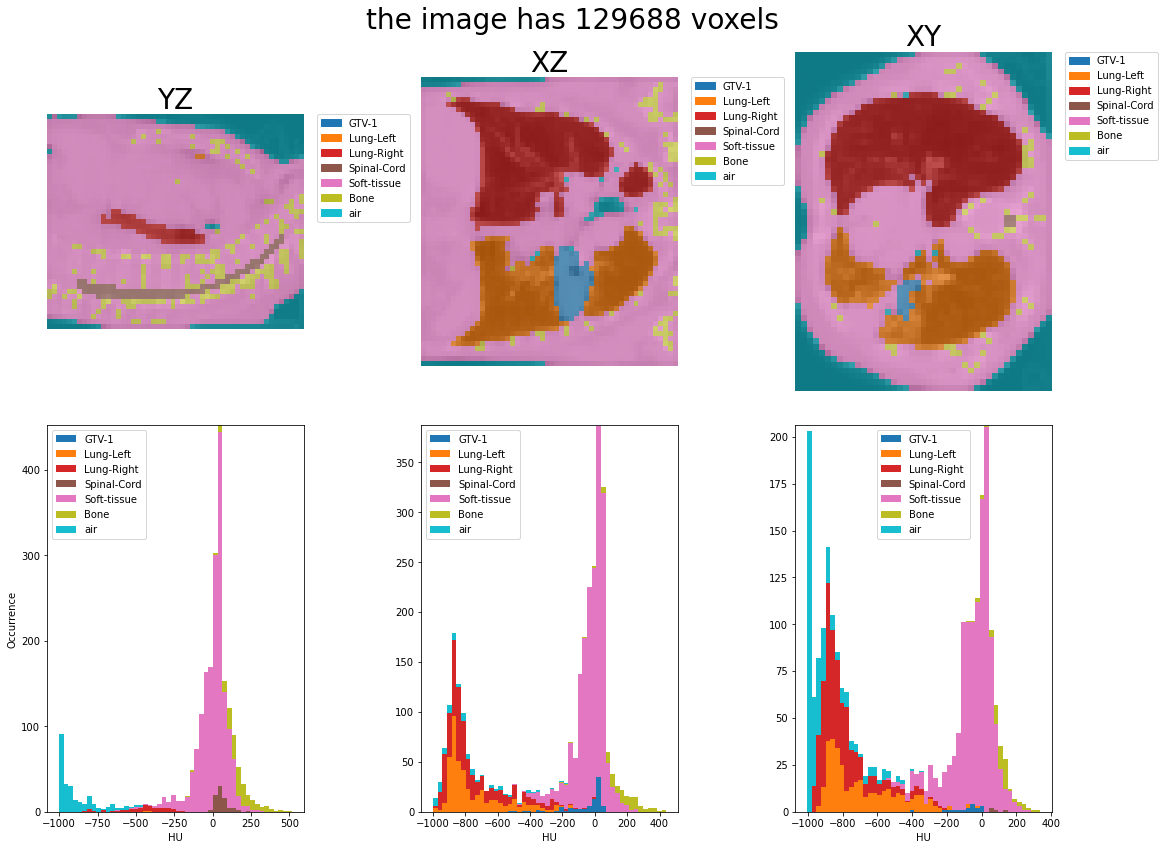

In [29]:
from skimage.transform import resize
img_BB_res = resize(img_BB,
                    resize_shape,
                    mode='constant',
                    cval=-1000,
                    anti_aliasing=True,
                    preserve_range=True,
                    order=3)
mask_BB_res = resize(mask_BB,
                    resize_shape,
                    mode='constant',
                    cval=7,
                    anti_aliasing=False,
                    preserve_range=True,
                    order=0)

# redefine mask names
mask_name = ["GTV-1",
             "Lung-Left",
             "Lung-Right",
             "Spinal-Cord",
             "Soft-tissue",
             "Bone",
             "air"]
values = range(1,len(mask_name)+1)

def plot_CT_n_mask(img_BB, mask_BB, sim_vox, mask_name= ["GTV-1","Lung-Left","Lung-Right","Spinal-Cord","Soft-tissue","Bone","air"], values=range(1,len(mask_name)+1)):
    
    x_dim, y_dim, z_dim = sim_vox
    yz_corr = y_dim / z_dim
    xz_corr = z_dim / x_dim
    xy_corr = x_dim / y_dim
    
    xm_BB = mask_BB.shape[0]//2
    ym_BB = mask_BB.shape[1]//2
    zm_BB = mask_BB.shape[2]//2

    fig, ax = plt.subplots(2, 3, figsize=(16,12), tight_layout=True)
    
    fig.suptitle("the image has {} voxels".format(img_BB.size),fontsize=28)
    
    ax[0,0].imshow(img_BB[xm_BB,...], aspect=yz_corr,cmap="gray")
    im1 = ax[0,0].imshow(mask_BB[xm_BB,...], aspect=yz_corr,alpha=0.65,cmap="tab10",vmin=1,vmax=7)
    ColorLegend(im1,values,ax[0,0])
    ax[0,0].set_title("YZ",size=28)

    ax[0,1].imshow(img_BB[:,ym_BB,:], aspect=xz_corr,cmap="gray")
    im2 = ax[0,1].imshow(mask_BB[:,ym_BB,:], aspect=xz_corr,alpha=0.65,cmap="tab10",vmin=1,vmax=7)
    ColorLegend(im2,values,ax[0,1])
    ax[0,1].set_title("XZ",size=28)

    ax[0,2].imshow(img_BB[...,zm_BB], aspect=xy_corr,cmap="gray")
    im3 = ax[0,2].imshow(mask_BB[...,zm_BB], aspect=xy_corr,alpha=0.65,cmap="tab10",vmin=1,vmax=7)
    ColorLegend(im3,values,ax[0,2])
    ax[0,2].set_title("XY",size=28)

    for i in range(3):
        ax[0,i].axis("off")
        ax[1,i].legend()

    cmap = plt.get_cmap('tab10')
    colors = [cmap(im1.norm(i)) for i in values]

    ax[1,0].hist([img_BB[xm_BB,...][mask_BB[xm_BB,...]==i] for i in values],50,label=mask_name, stacked=True,color=colors)
    ax[1,1].hist([img_BB[:,ym_BB,:][mask_BB[:,ym_BB,:]==i] for i in values],50,label=mask_name, stacked=True,color=colors)
    ax[1,2].hist([img_BB[...,zm_BB][mask_BB[...,zm_BB]==i] for i in values],50,label=mask_name, stacked=True,color=colors)
    for i in range(3):
        ax[1,i].set_xlabel("HU")
        ax[1,i].legend()
    ax[1,0].set_ylabel("Occurrence")
    plt.show()
    plt.close()
    
plot_CT_n_mask(img_BB_res, mask_BB_res, sim_vox)

### Generate the MC geometry

At this point we have all the data needed to start creating our geometry, starting from the definition of the cubes containing the different materials of the universe

In [30]:
print("$ surface universe")
print("1 rpp -100 100 -100 100 -100 100")
print("$ material universe")
for i in range(len(mask_name)):
    print("{} {} -1 -1 u={} $ cell - {}".format(values[i],values[i],values[i],mask_name[i]))

$ surface universe
1 rpp -100 100 -100 100 -100 100
$ material universe
1 1 -1 -1 u=1 $ cell - GTV-1
2 2 -1 -1 u=2 $ cell - Lung-Left
3 3 -1 -1 u=3 $ cell - Lung-Right
4 4 -1 -1 u=4 $ cell - Spinal-Cord
5 5 -1 -1 u=5 $ cell - Soft-tissue
6 6 -1 -1 u=6 $ cell - Bone
7 7 -1 -1 u=7 $ cell - air


Now we generate our lattice universe

In [32]:
import textwrap
print("$ lattice containing box")
print("100 rpp {:1.4f} {:1.4f} {:1.4f} {:1.4f} {:1.4f} {:1.4f}".format(-cm[0]/2,
                                          cm[0]/2,
                                         -cm[1]/2,
                                          cm[1]/2,
                                         -cm[2]/2,
                                          cm[2]/2))
print("$ lattice box")
print("101 rpp {:1.4f} {:1.4f} {:1.4f} {:1.4f} {:1.4f} {:1.4f}".format(-cm[0]/2,
                                                                       -cm[0]/2+sim_vox[0],
                                                                       -cm[1]/2,
                                                                       -cm[1]/2+sim_vox[1],
                                                                       -cm[2]/2,
                                                                       -cm[2]/2+sim_vox[2]))
print("$ fill lattice universe")
print("100 0 -100 fill=101")
print("$ lattice universe")
print("101 0 -101 LAT=1 U=101")
shape = resize_shape - 1
print("       FILL={}:{} {}:{} {}:{}".format(0,
                                              shape[0],
                                              0,
                                              shape[1],
                                              0,
                                              shape[2]))
lattice = ""
for k in range(mask_BB_res.shape[2]):
    for j in range(mask_BB_res.shape[1]):
        for i in range(mask_BB_res.shape[0]):
            lattice = lattice + "{:d} ".format(int(mask_BB_res[i,j,k]))
print(textwrap.fill(lattice, width=80, initial_indent="       ", subsequent_indent="       "))

$ lattice containing box
100 rpp -17.4316 17.4316 -13.1836 13.1836 -15.7500 15.7500
$ lattice box
101 rpp -17.4316 -16.8305 -13.1836 -12.5704 -15.7500 -15.1442
$ fill lattice universe
100 0 -100 fill=101
$ lattice universe
101 0 -101 LAT=1 U=101
       FILL=0:57 0:42 0:51
       7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7
       7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5
       5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7
       7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
       5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5
       5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
       5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
       5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7
       7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 5 5 5 5 5 